In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.preprocess_data import get_data
from scripts.user_overview_analysis import aggregate_xdr
from scripts.user_overview_analysis import top_10_headset, top_3_manufacturers ,plot_top_handsets_by_manufacturer,vis_aggregate
from scripts.exploratory_data_analysis import describe_all,variable_transformation,non_graphical_univariate_analysis,metrics_analysis,univariate_analysis,bivariate_analysis,correlation_analysis,dim_reduction_using_pca

In [3]:
df  = get_data()

d:\Tenx Projects\week2\scripts\load.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Removed columns: ['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms).1', 'UL TP < 10 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 'Nb of sec with Vol UL < 1250B', 'DL TP > 1 Mbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP < 50 Kbps (%)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Last Location Name']
Dropped 572 rows due to missing values in 'IMEI'
Dropped 0 rows due to missing values in 'IMSI'
Dropped 494 rows due to missing values in 'MSISDN/Number'
Dropped 429 rows due to missing values in 'Bearer Id'


d:\Tenx Projects\week2\scripts\clean_dataset.py:62: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Filled missing values in 'Bearer Id' using mean
Filled missing values in 'Dur. (ms)' using mean
Filled missing values in 'IMSI' using mean
Filled missing values in 'MSISDN/Number' using mean
Filled missing values in 'IMEI' using mean
Filled missing values in 'Avg RTT DL (ms)' using mean
Filled missing values in 'Avg RTT UL (ms)' using mean
Filled missing values in 'Avg Bearer TP DL (kbps)' using mean
Filled missing values in 'Avg Bearer TP UL (kbps)' using mean
Filled missing values in 'TCP DL Retrans. Vol (Bytes)' using mean
Filled missing values in 'TCP UL Retrans. Vol (Bytes)' using mean
Filled missing values in 'HTTP DL (Bytes)' using mean
Filled missing values in 'HTTP UL (Bytes)' using mean
Filled missing values in 'Activity Duration DL (ms)' using mean
Filled missing values in 'Activity Duration UL (ms)' using mean
Filled missing values in 'Social Media DL (Bytes)' using mean
Filled missing values in 'Social Media UL (Bytes)' using mean
Filled missing values in 'Google DL (Bytes

In [4]:
df.head(10)

,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,86399.0,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.0,44.0,21.006809,...,15.854611,2.501332,8.198936,9.656251,278.082303,14.344150,171.744450,8.814393,36.749741,308.879636
1,1.311448e+19,86399.0,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.0,26.0,21.006809,...,20.247395,19.111729,18.338413,17.227132,608.750074,1.170709,526.904238,15.055145,53.800391,653.384965
2,1.311448e+19,86399.0,2.082003e+14,3.376063e+10,3.528151e+13,106.199942,17.628232,6.0,9.0,21.006809,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+19,86399.0,2.082014e+14,3.375034e+10,3.535661e+13,106.199942,17.628232,44.0,44.0,21.006809,...,21.388122,15.146643,13.994646,1.097942,799.538153,10.849722,749.039933,12.797283,43.324218,455.940801
4,1.311448e+19,86399.0,2.082014e+14,3.369980e+10,3.540701e+13,106.199942,17.628232,6.0,9.0,21.006809,...,15.259380,18.962873,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589
5,1.311448e+19,86399.0,2.082014e+14,3.366819e+10,3.529841e+13,106.199942,17.628232,70.0,54.0,21.006809,...,21.332918,2.611113,7.345361,6.536448,710.293538,13.167974,654.978277,4.436057,30.307754,754.452212
6,1.311448e+19,86399.0,2.082014e+14,3.366537e+10,3.572231e+13,102.000000,5.000000,22.0,38.0,21.006809,...,7.234465,1.886295,13.231006,17.981760,44.796223,14.084934,421.861759,10.649768,47.925246,70.562047
7,1.304243e+19,86399.0,2.082010e+14,3.376349e+10,8.654640e+13,39.000000,18.000000,3698.0,416.0,0.019520,...,12.189786,19.735183,6.858496,12.075206,748.906189,8.291649,537.601820,7.714657,58.813016,775.350343
8,1.311448e+19,86399.0,2.082014e+14,3.369874e+10,3.556241e+13,106.199942,17.628232,46.0,49.0,21.006809,...,18.436641,10.860867,10.587264,8.467177,423.466906,6.548349,172.920486,14.749031,42.363146,455.940801
9,1.304243e+19,86399.0,2.082003e+14,3.365922e+10,3.557311e+13,97.000000,7.000000,3845.0,2535.0,3.231397,...,16.338345,6.573194,12.211149,0.974201,423.466906,1.591237,64.856042,12.815208,22.417975,455.940801


In [5]:
df.columns

Index(['Bearer Id', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Handset Manufacturer', 'Handset Type', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

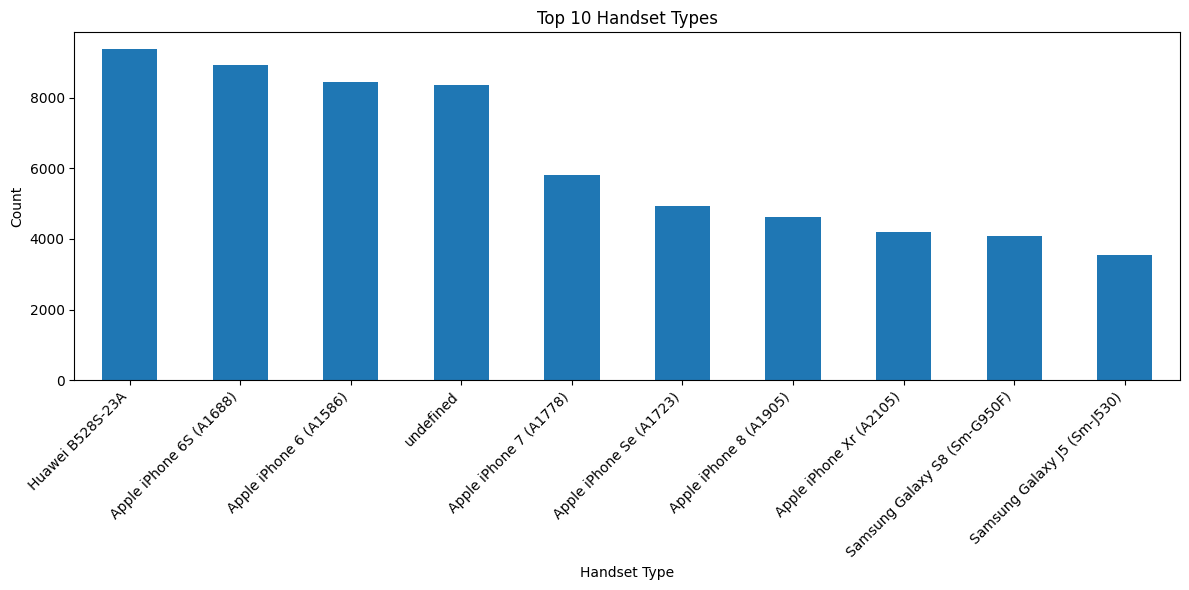

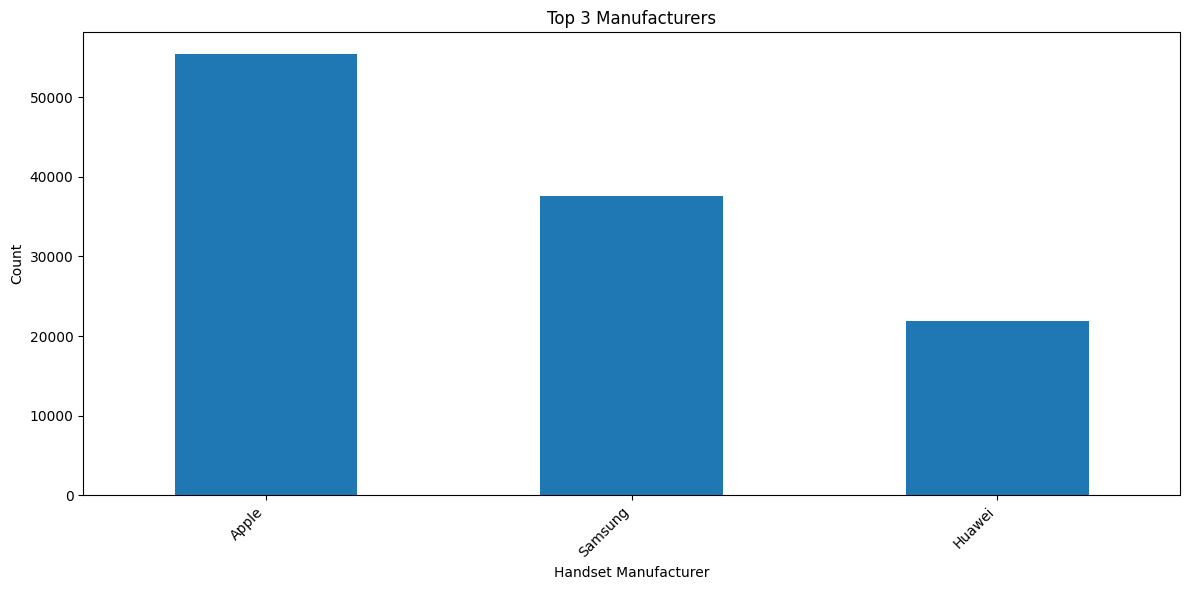

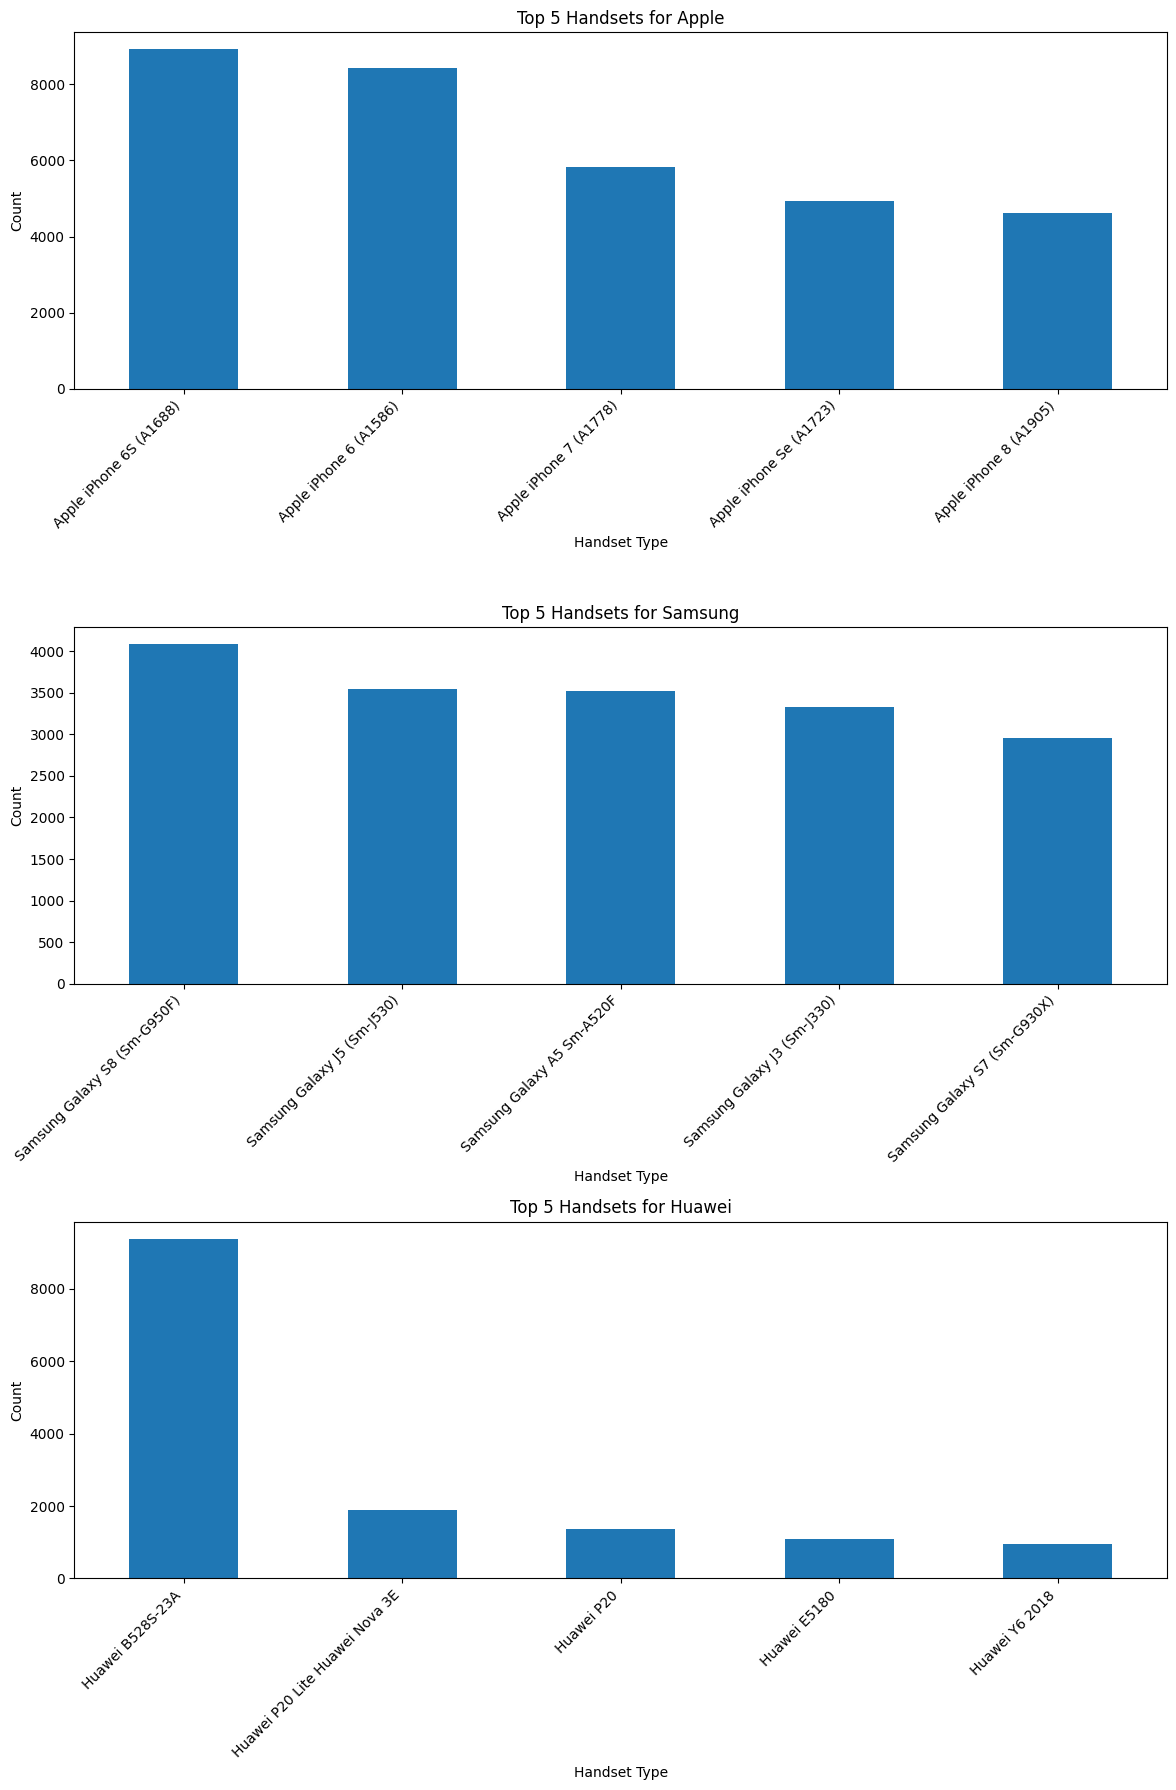

In [6]:
top_10_headset(df)
top_3_manufacturers(df)
plot_top_handsets_by_manufacturer(df)

In [7]:
#vis_aggregate(df)
aggregate_xdr(df)

In [8]:
describe_all(df)

Data Types:
 Bearer Id                      float64
Dur. (ms)                      float64
IMSI                           float64
MSISDN/Number                  float64
IMEI                           float64
Avg RTT DL (ms)                float64
Avg RTT UL (ms)                float64
Avg Bearer TP DL (kbps)        float64
Avg Bearer TP UL (kbps)        float64
TCP DL Retrans. Vol (Bytes)    float64
TCP UL Retrans. Vol (Bytes)    float64
HTTP DL (Bytes)                float64
HTTP UL (Bytes)                float64
Activity Duration DL (ms)      float64
Activity Duration UL (ms)      float64
Handset Manufacturer            object
Handset Type                    object
Social Media DL (Bytes)        float64
Social Media UL (Bytes)        float64
Google DL (Bytes)              float64
Google UL (Bytes)              float64
Email DL (Bytes)               float64
Email UL (Bytes)               float64
Youtube DL (Bytes)             float64
Youtube UL (Bytes)             float64
Netflix DL (

In [9]:
metrics_analysis(df)


Basic Metrics:
           Bearer Id      Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
count  1.280060e+05  128006.000000  1.280060e+05   1.280060e+05  1.280060e+05   
mean   9.740883e+18   93759.872662  2.082014e+14   3.366762e+10  4.276360e+13   
std    2.853116e+18   50367.022509  4.400973e+08   3.799125e+07  1.803527e+13   
min    6.917538e+18    7142.000000  2.082001e+14   3.360100e+10  4.400152e+11   
25%    7.349883e+18   56439.250000  2.082010e+14   3.365067e+10  3.542011e+13   
50%    7.349883e+18   86399.000000  2.082015e+14   3.366354e+10  3.567621e+13   
75%    1.304243e+19  125649.500000  2.082017e+14   3.367215e+10  3.590391e+13   
max    1.311448e+19  238301.000000  2.082021e+14   3.376819e+10  8.666840e+13   

       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
count    128006.000000    128006.000000            128006.000000   
mean         60.364422         9.238736              5900.721076   
std          33.522489         7.907625          

In [10]:
df.columns

Index(['Bearer Id', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Handset Manufacturer', 'Handset Type', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

In [11]:
variable_transformation(df)

   Duration_Decile  Total_Data_Volume  Total_Duration
0                0       1.214847e+07    27423.052379
1                1       2.021276e+07    76230.259194
2                2       4.083663e+06    87795.762947
3                3       1.212172e+07   112596.220773
4                4       1.223437e+07   172440.190618


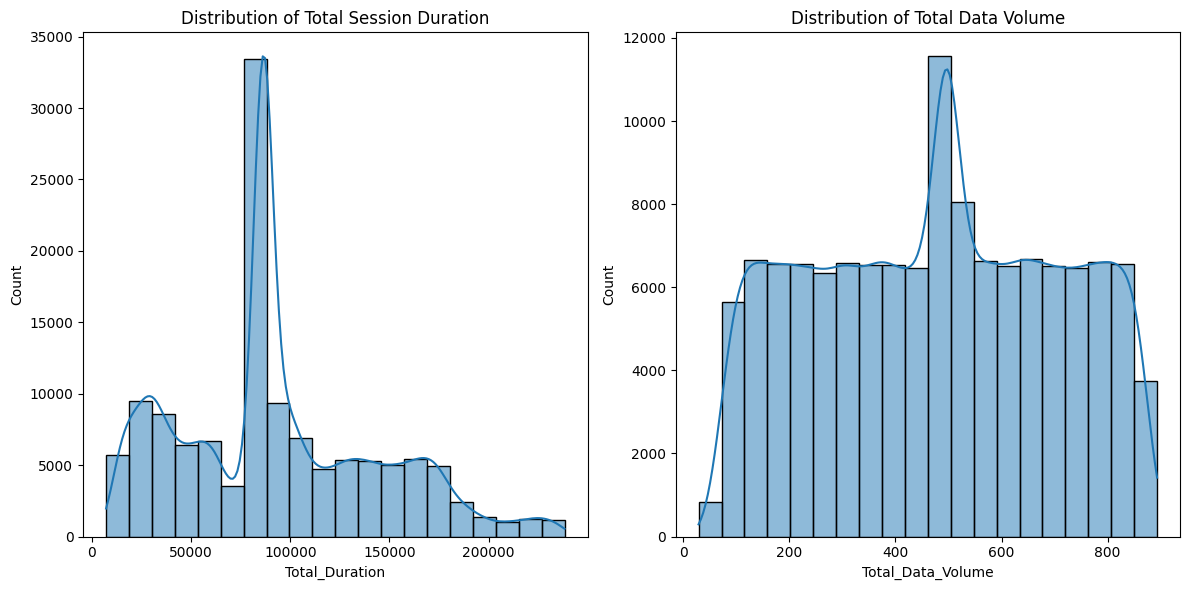

In [12]:

univariate_analysis(df)

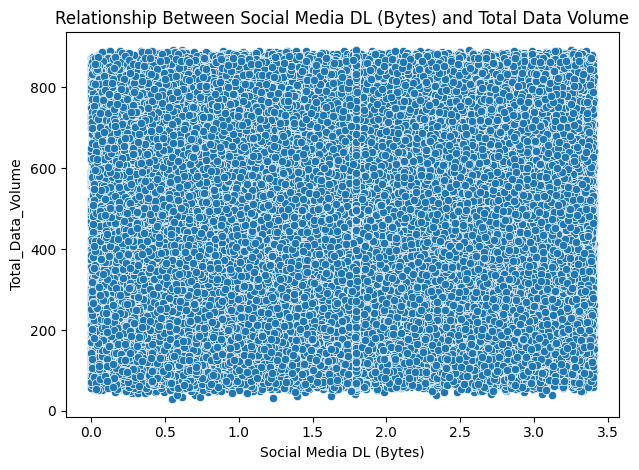

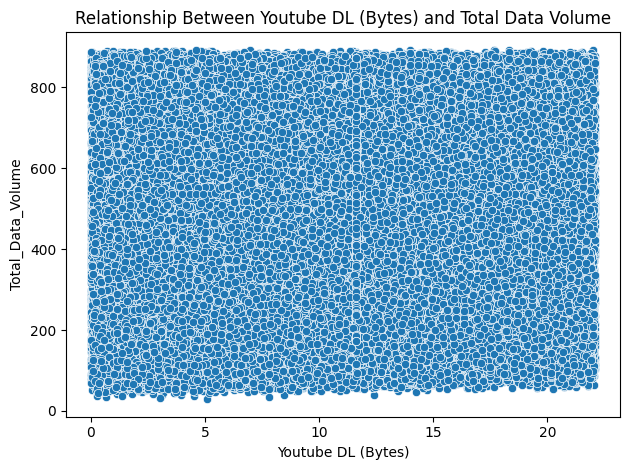

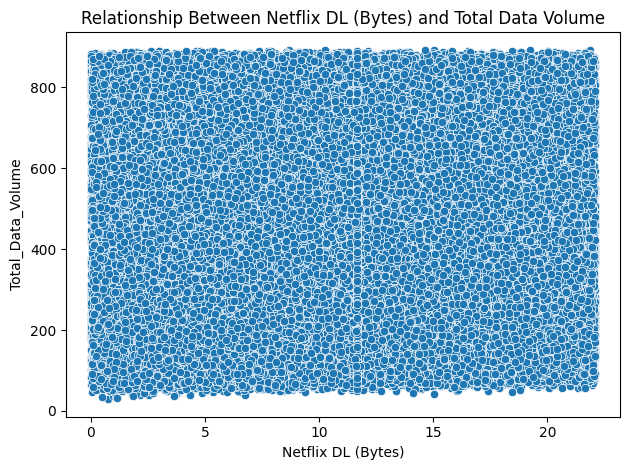

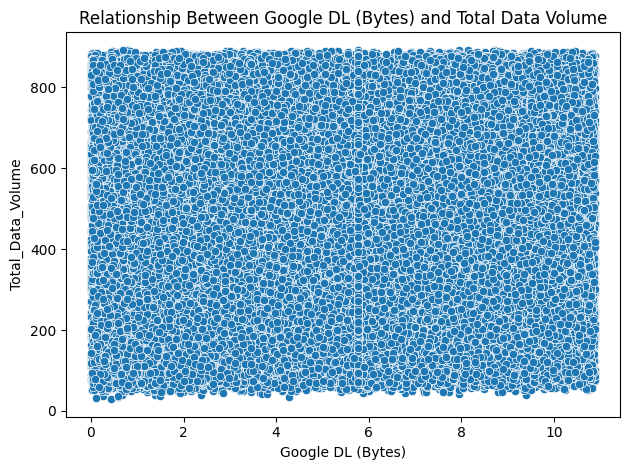

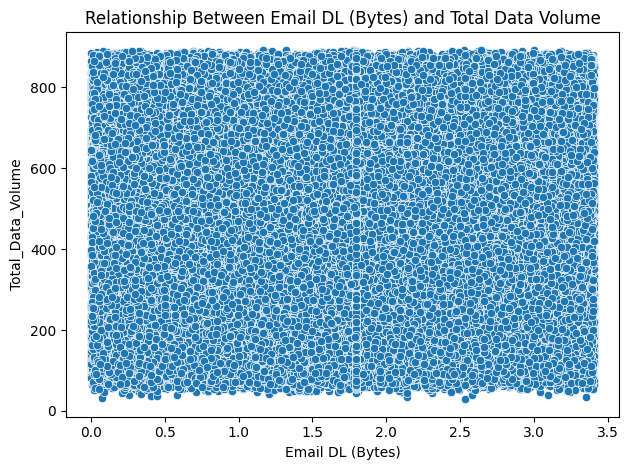

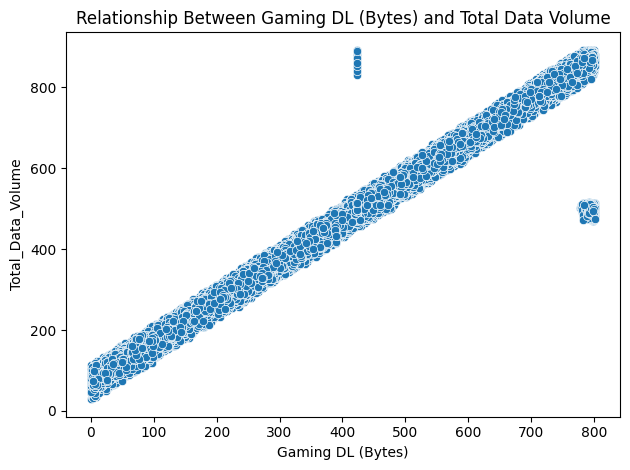

In [13]:
bivariate_analysis(df)

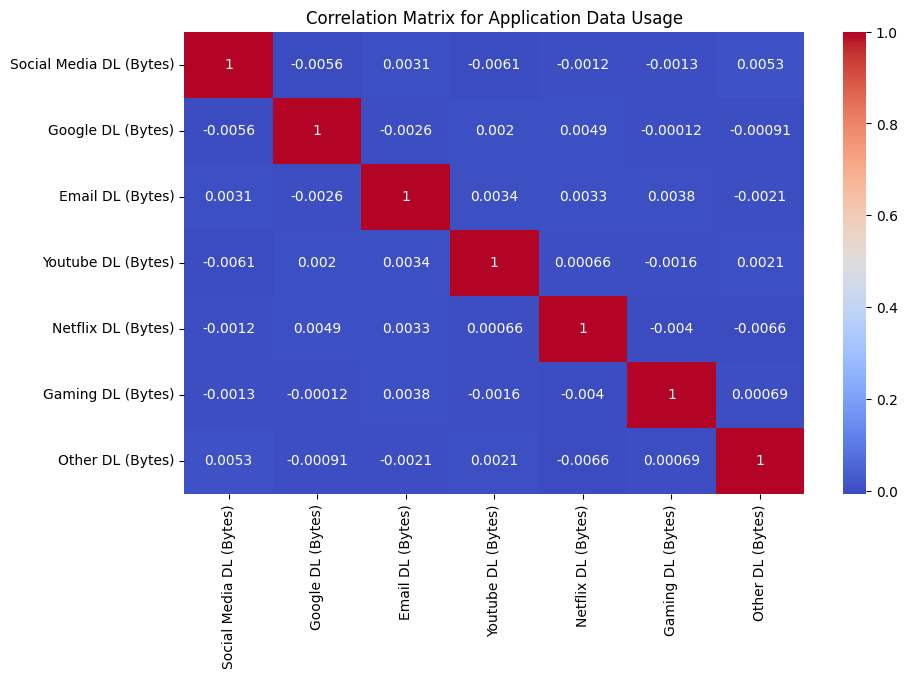

In [14]:
correlation_analysis(df)

In [15]:
df.columns

Index(['Bearer Id', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
       'Handset Manufacturer', 'Handset Type', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)',
       'Total_Duration', 'Total_Data_Volume', 'Duration_Decile'],
      dtype='object')

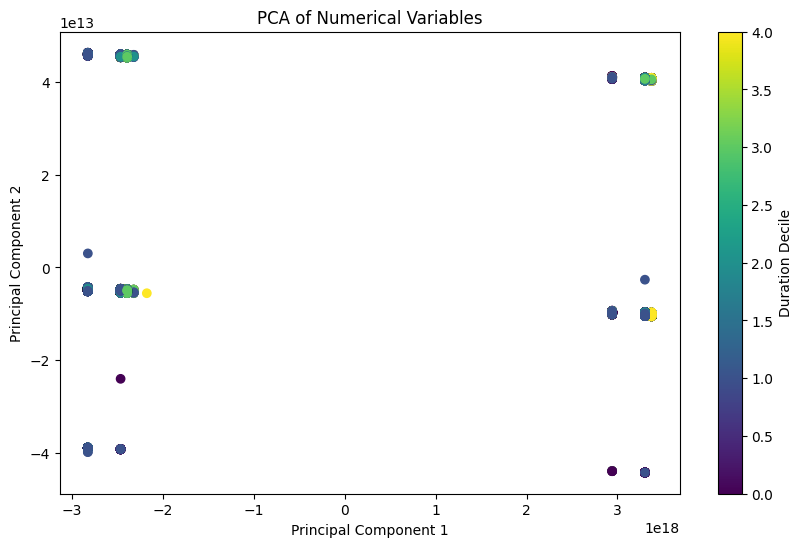


Explained Variance by PCA Components:
 [1.00000000e+00 3.91909145e-11]


In [16]:

dim_reduction_using_pca(df)